# シンプルなディープラーニング
Kerasを使って、最小限のディープラーニングを実装します。

## データの読み込み
Irisデータセットを読み込みます。  
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [16]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])  # データを10個表示
print(iris.target[:10])  # ラベルを10個表示
print(iris.data.shape)  # データの形状を表示

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


## データの前処理
データの前処理として、標準化を行います。  
標準化は、平均値が0、標準偏差が1になるように変換する処理です。  
https://scikit-learn.org/stable/modules/preprocessing.html  
  
ラベルをone-hot表現に変換します。  
one-hot表現は、一箇所だけ1で残りは０の配列です。  
https://keras.io/ja/utils/np_utils/

In [2]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()  # 標準化のためのスケーラー
scaler.fit(iris.data)  # パラメータの計算
x = scaler.transform(iris.data)  # データの変換
print(x[:10])

t = np_utils.to_categorical(iris.target)  # ラベルをone-hot表現に変換
print(t[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


## 訓練データとテストデータ
データを訓練用のデータとテスト用のデータに分割します。  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
from sklearn.model_selection import train_test_split

# x_train: 訓練用の入力データ
# x_test: テスト用の入力データ
# t_train: 訓練用の正解データ
# t_test: テスト用の正解データ
# train_size=0.75: 75%が訓練用、25%がテスト用
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

## モデルの構築
4層からなる、シンプルなディープラーニングのモデルを構築します。  
**Sequentilal**: 単純に層を積み重ねるモデル  
https://keras.io/ja/models/sequential/

**Dense**: 全結合層  
https://keras.io/ja/layers/core/#dense  

**Activation**: 活性化関数  
https://keras.io/ja/layers/core/#activation  

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4)) # 4つの特徴が入力なので、入力層のニューロン数は4、中間層のニューロン数は32
model.add(Activation('relu')) # 活性化関数（ReLU）を追加
model.add(Dense(32)) # ニューロン数32の全結合層を追加
model.add(Activation('relu')) # 活性化関数（ReLU）を追加
model.add(Dense(3)) # 3つに分類するので、出力層のニューロン数は3
model.add(Activation('softmax')) # 3つ以上の分類にはソフトマックス関数を使用
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy']) # モデルのコンパイル

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
______________________________________________________

## 学習
訓練用の入力データと正解データを使って、モデルを訓練します。  
**fit**: モデルを訓練する  
https://keras.io/ja/models/sequential/#fit  

In [6]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 14s 2ms/step - loss: 1.1010 - accuracy: 0.2647
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9535 - accuracy: 0.4437
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8459 - accuracy: 0.6644
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8168 - accuracy: 0.6445
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7510 - accuracy: 0.7235
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.7896
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.7767
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.7974
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.7714
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.8401
Epoch 11/30
14/14 

## 学習の推移
Historyには学習の経過が記録されています。  
これを使って、学習の推移を表示します。

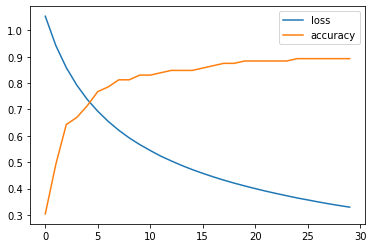

In [9]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']  # 訓練用データの誤差
hist_acc = history.history['accuracy']  # 検証用データの誤差

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

## 評価
モデルの評価を行います。  
**evaluate**: 入力、正解データから誤差などを計算します。  
https://keras.io/ja/models/sequential/#evaluate

In [10]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 6ms/step - loss: 0.2930 - accuracy: 0.9737
0.2930161654949188 0.9736841917037964


## 予測
学習済みのモデルを使って予測を行います。  
**predict**: モデルを使って入力を出力に変換します。  
https://keras.io/ja/models/sequential/#predict

In [11]:
model.predict(x_test)

array([[0.15235546, 0.6620674 , 0.18557714],
       [0.9959592 , 0.00157236, 0.00246851],
       [0.03470038, 0.19000256, 0.77529705],
       [0.9771532 , 0.01129176, 0.01155498],
       [0.99112433, 0.00417352, 0.00470204],
       [0.19761676, 0.5797161 , 0.2226672 ],
       [0.16151309, 0.60757136, 0.23091556],
       [0.05807031, 0.4167892 , 0.5251405 ],
       [0.07806353, 0.35599345, 0.565943  ],
       [0.08499743, 0.66765726, 0.24734534],
       [0.15474084, 0.4828298 , 0.36242935],
       [0.12874559, 0.6912055 , 0.18004899],
       [0.13263589, 0.7106897 , 0.15667434],
       [0.9564135 , 0.0282825 , 0.01530404],
       [0.9823214 , 0.01015299, 0.00752571],
       [0.12776186, 0.7299819 , 0.14225623],
       [0.98177093, 0.01023292, 0.00799617],
       [0.98135436, 0.01006584, 0.00857985],
       [0.97657335, 0.0129503 , 0.01047634],
       [0.9838817 , 0.00867243, 0.00744589],
       [0.0443501 , 0.24803446, 0.7076155 ],
       [0.18917377, 0.61559176, 0.19523449],
       [0.

## モデルの保存
学習済みのモデルを保存します。  
**save**: モデルを保存します。  
**load_model**: 保存されたモデルを読み込みます。    
https://keras.io/ja/getting-started/faq/#_4  

In [12]:
from keras.models import load_model

model.save('model.h5')
load_model('model.h5')

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(3))
model.add(Activation("softmax"))
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                160       
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
____________________________________________________

In [18]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 15s 2ms/step - loss: 1.0974 - accuracy: 0.3782
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9812 - accuracy: 0.7336
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9176 - accuracy: 0.6551
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8384 - accuracy: 0.6961
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8433 - accuracy: 0.6060
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7372 - accuracy: 0.6938
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.7335
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.8132
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.7788
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.8420
Epoch 11/30
14/14 

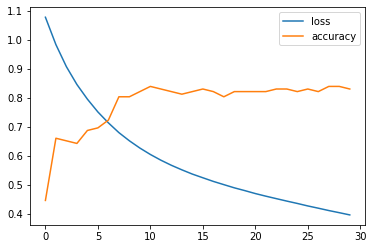

In [21]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']  # 訓練用データの誤差
hist_acc = history.history['accuracy']  # 検証用データの誤差

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

In [22]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 5ms/step - loss: 0.3740 - accuracy: 0.8684
0.3740328848361969 0.8684210777282715
